# MNIST

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100%; }</style>"))
np.set_printoptions(precision=3, suppress=True)

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1, data_home="datasets/")

In [3]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',


In [4]:
mnist["data"].shape, mnist["data"].min(), mnist["data"].max()

((70000, 784), 0.0, 255.0)

In [5]:
mnist["target"].shape, mnist["target"].min(), mnist["target"].max()

((70000,), '0', '9')

In [6]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"].astype("int32")

train_size = 60000
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

shuffle_index = np.random.permutation(train_size)
X_train = X_train[shuffle_index]
y_train = y_train[shuffle_index]

X_train.shape, X_test.shape, y_train.size, y_test.size

((60000, 784), (10000, 784), 60000, 10000)

In [7]:
y9s = (y_train==9)

# numpy.flatnonzero(a): Return indices that are non-zero in the flattened version of a.
nines = np.flatnonzero(y9s)
nines

array([    2,     4,     8, ..., 59984, 59992, 59999])

Label: 9


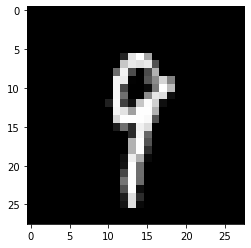

In [8]:
import matplotlib

# Sample for number 9
plt.imshow(X_train[nines[0]].reshape(28, 28), cmap="gray", interpolation="nearest")
print(f"Label: {y_train[nines[0]]}")

Label: 9


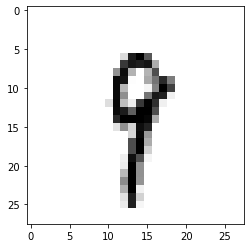

In [9]:
plt.imshow(X_train[nines[0]].reshape(28, 28), cmap=matplotlib.cm.binary, interpolation="nearest")
print(f"Label: {y_train[nines[0]]}")

Label: 5


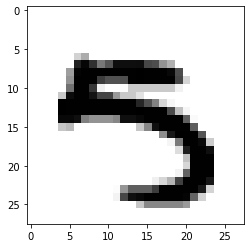

In [10]:
# Sample for number that is not 9
plt.imshow(X_train[~nines[2]].reshape(28, 28), cmap=matplotlib.cm.binary, interpolation="nearest")
print(f"Label: {y_train[~nines[2]]}")

## 1a) Binary Classification

In [11]:
from sklearn.linear_model import SGDClassifier

y_train_9 = (y_train==9)
y_test_9 = (y_test==9)

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train_9)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

## Metrics
### Accuracy Score

In [12]:
from sklearn.metrics import accuracy_score

y_test_pred = sgd_clf.predict(X_test)
score = accuracy_score(y_test_9, y_test_pred)
print(score)

0.9538


In [13]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_9, cv=3, scoring="accuracy")

array([0.948, 0.929, 0.929])

In [14]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_9, cv=3)
y_train_pred.shape

(60000,)

### Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_9, y_train_pred)

array([[50901,  3150],
       [  785,  5164]])

### Precision, Recall, f1-score

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(precision_score(y_train_9, y_train_pred))

0.6211210007216743


In [17]:
print(recall_score(y_train_9, y_train_pred))

0.8680450495881661


In [18]:
print(f1_score(y_train_9, y_train_pred))

0.7241113370258713


### Classification Report

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_train_9, y_train_pred))

              precision    recall  f1-score   support

       False       0.98      0.94      0.96     54051
        True       0.62      0.87      0.72      5949

    accuracy                           0.93     60000
   macro avg       0.80      0.90      0.84     60000
weighted avg       0.95      0.93      0.94     60000



In [20]:
y_train_score = sgd_clf.decision_function([X_train[0]])
y_train_score

array([-7756.102])

In [21]:
y_train_scores = cross_val_predict(sgd_clf, X_train, y_train_9, cv=3, method="decision_function")

### Precision-Recall Curve

In [22]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_9, y_train_scores)

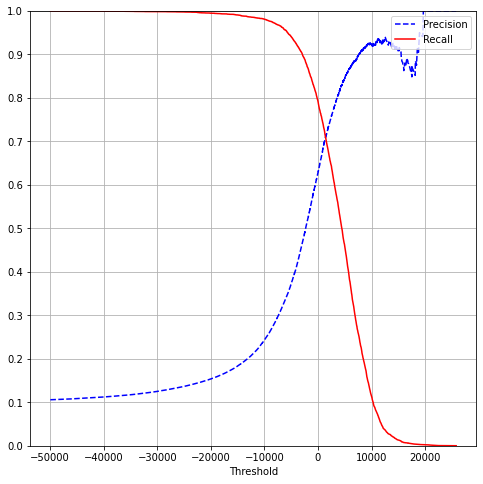

In [23]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "r-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper right")
    plt.grid("on")
    plt.ylim([0, 1])
    plt.xticks(np.arange(int(round(np.min(thresholds)/10000)*10000), int(round(np.max(thresholds)/10000)*10000), 10000))
    plt.yticks(np.linspace(0, 1, 11))

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

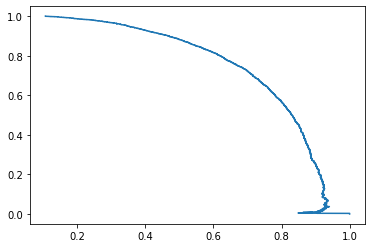

In [24]:
plt.plot(precisions, recalls)

### ROC Curve

In [25]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_train_9, y_train_scores)

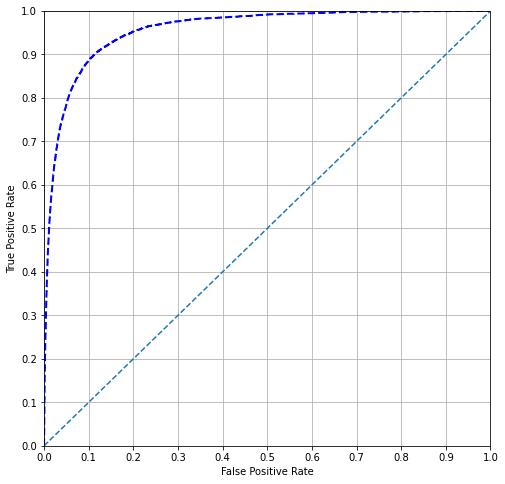

In [26]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, "b--", linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.xticks(np.linspace(0, 1, 11))
    plt.yticks(np.linspace(0, 1, 11))
    plt.axis([0, 1, 0, 1])
    plt.grid("on")

plot_roc_curve(fpr, tpr)
plt.show()

### ROC AUC Score

In [27]:
from sklearn.metrics import roc_auc_score

# The dotted line represents the ROC curve of a purely random classifier; ROC_AUC = 0.5 for purely random classifier
roc_auc_score(y_train_9, y_train_scores)

0.9571589123075922

In [28]:
from sklearn.ensemble import RandomForestClassifier

rndforest = RandomForestClassifier()
y_probas_forest = cross_val_predict(rndforest, X_train, y_train_9, cv=3, method="predict_proba", verbose=2, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   40.0s finished


In [29]:
y_scores_forest = y_probas_forest[:, 1] # score = probability of positive class

fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_9, y_scores_forest)

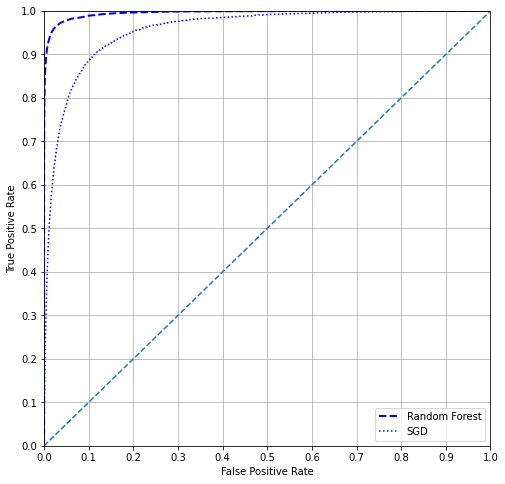

In [30]:
plot_roc_curve(fpr_forest, tpr_forest, label="Random Forest")
plt.plot(fpr, tpr, "b:", label="SGD")
plt.legend(loc="lower right")
plt.show()

In [31]:
roc_auc_score(y_train_9, y_scores_forest)

0.9953690288191146

In [32]:
y_predict_forest = cross_val_predict(rndforest, X_train, y_train_9, cv=3, verbose=2, n_jobs=-1)

precision_score(y_train_9, y_predict_forest)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   41.3s finished


0.9819430814524043

In [33]:
recall_score(y_train_9, y_predict_forest)

0.8409816775928728

## 1b) Multi-Class Classification
### SGD Classifier

In [34]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([X_train[0]])

array([3], dtype=int32)

In [35]:
some_digit_scores = sgd_clf.decision_function([X_train[0]])
some_digit_scores

array([[-28935.346, -25213.536, -32476.783,   3925.859,  -8239.222,
         -1329.509, -42743.232,  -7688.102, -10456.982,  -1368.874]])

In [36]:
np.argmax(some_digit_scores)

3

In [37]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

### OneVsOne (OvO) classifier

In [38]:
from sklearn.multiclass import OneVsOneClassifier

# If there are N classes, you need to train N × (N – 1) / 2 classifiers
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([X_train[0]])

array([5], dtype=int32)

In [39]:
len(ovo_clf.estimators_)

45

### Random Forest Classifier

In [40]:
rndforest.fit(X_train, y_train)
rndforest.predict([X_train[0]])

array([5], dtype=int32)

In [41]:
rndforest.predict_proba([X_train[0]])

array([[0.  , 0.  , 0.  , 0.13, 0.02, 0.74, 0.01, 0.  , 0.02, 0.08]])

## 2) Preprocessing
### Standard Scaling Inputs

In [42]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy", verbose=2, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.9min finished


array([0.887, 0.88 , 0.859])

In [43]:
from sklearn.preprocessing import StandardScaler

## Preprocessing increases accuracy score
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy", verbose=2, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  4.7min finished


array([0.9  , 0.902, 0.898])

In [44]:
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3, verbose=2, n_jobs=-1)

conf_mx = confusion_matrix(y_train, y_train_pred)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  4.6min finished


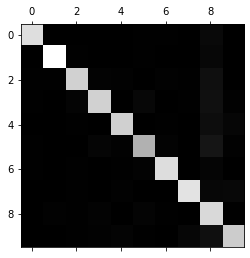

In [45]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

## 3) Hyperparameter Tuning
### Grid Search with Cross Validation

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
param_grid = [
    {"n_neighbors": list(range(3, 6)), "weights": ["uniform", "distance"]}
]

gridsearch = GridSearchCV(knn, param_grid=param_grid, cv=2, scoring="accuracy", verbose=2, n_jobs=-1)
gridsearch.fit(X_train, y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed: 47.5min remaining: 95.0min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 74.6min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=2)

In [48]:
print(gridsearch.best_score_)
print(gridsearch.best_params_)

0.9684333333333334
{'n_neighbors': 4, 'weights': 'distance'}


In [49]:
from sklearn.metrics import accuracy_score 

y_pred = gridsearch.predict(X_test)
accuracy_score(y_test, y_pred)

0.9714

## 4) Feature Engineering
### Shifted Images to Increase Training Data

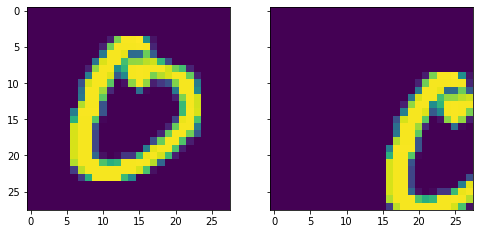

In [48]:
from scipy.ndimage import shift 

def shift_image(img, shift_x, shift_y, color=0):
    # cval: scalar, optional, value to fill past edges of input if mode is ‘constant’. Default is 0.0.
    return shift(img.reshape(28, 28), [shift_y, shift_x], cval=color).reshape([-1])

shifted_img = shift_image(X_train[0], 10, 5)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 12), sharey=True)
axes[0].imshow(X_train[0].reshape(28, 28))
axes[1].imshow(shifted_img.reshape(28, 28))

In [49]:
X_train_expended = [X_train]
y_train_expended = [y_train]

# numpy.apply_along_axis(func1d, axis, arr, *args, **kwargs)
# Apply a function to 1-D slices along the given axis.
shifts = [[0, 1], [0, -1], [1, 0], [-1, 0]]
for s_x, s_y in shifts:
    shifted_images = np.apply_along_axis(shift_image, arr=X_train, shift_x=s_x, shift_y=s_y, axis=1)
    X_train_expended.append(shifted_images)
    y_train_expended.append(y_train)

X_train_expended = np.concatenate(X_train_expended)
y_train_expended = np.concatenate(y_train_expended)

shuffle_idx = np.random.permutation(len(X_train_expended))
X_train_expended = X_train_expended[shuffle_idx]
y_train_expended = y_train_expended[shuffle_idx]

print(X_train_expended.shape, y_train_expended.shape)

(300000, 784) (300000,)


In [50]:
## Added 0.005% to accuracy with additional training data

knn = KNeighborsClassifier(**gridsearch.best_params_)
knn.fit(X_train_expended, y_train_expended)

y_pred_expended = knn.predict(X_test)
accuracy_score(y_test, y_pred_expended)

0.9763

## 5) Using Different Models - Support Vector Machines

In [50]:
from sklearn.svm import LinearSVC

# Linear SVM classifier automatically use One vs All
# This class supports both dense and sparse input and the multiclass support is handled according to a one-vs-the-rest scheme.
# multi_class="ovr" (default)

linsvc_clf = LinearSVC()
linsvc_clf.fit(X_train, y_train)

/Users/asd/.virtualenvs/ds/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [51]:
y_pred = linsvc_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.836

In [52]:
linsvc_clf = LinearSVC()
linsvc_clf.fit(X_train_scaled, y_train)

/Users/asd/.virtualenvs/ds/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [53]:
y_pred = linsvc_clf.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9097

In [54]:
from sklearn.svm import SVC

sample_size = 10000

svc_clf = SVC()
svc_clf.fit(X_train_scaled[:sample_size], y_train[:sample_size])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [55]:
# Model trained with smaller training data but resulted in higher accuracy

y_pred = svc_clf.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9405

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_dist = {
    "C": uniform(1, 10),
    "gamma": reciprocal(0.001, 0.1)
}

randcv = RandomizedSearchCV(svc_clf, param_distributions=param_dist, cv=3, verbose=2, n_jobs=-1)
randcv.fit(X_train_scaled[:sample_size], y_train[:sample_size])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 17.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1281b4b90>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x128194990>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [57]:
randcv.best_estimator_

SVC(C=2.760089378529537, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.003192261397606252, kernel='rbf', max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)

In [58]:
randcv.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=2.760089378529537, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.003192261397606252, kernel='rbf', max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)

In [59]:
y_pred = randcv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9621

## 6) Using Different Models - Neural Networks
### Deep Neural Network (DNN)

In [60]:
import tensorflow as tf
from tensorflow import keras

n_classes = 10
dropout_rate = 0.2
n_epochs = 4

model = keras.models.Sequential([
    keras.layers.Dense(300, input_shape=[784]),
    keras.layers.Dense(150, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dropout(dropout_rate),
    keras.layers.Dense(150, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dropout(dropout_rate),
    keras.layers.Dense(n_classes, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 150)               45150     
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
dropout_1 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1510      
Total params: 304,810
Trainable params: 304,810
Non-trainable params: 0
__________________________________________________

In [61]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_test_scaled, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 12s 193us/sample - loss: 0.4182 - accuracy: 0.8919 - val_loss: 0.1957 - val_accuracy: 0.9463
Epoch 2/4
60000/60000 [==============================] - 10s 169us/sample - loss: 0.2406 - accuracy: 0.9337 - val_loss: 0.1540 - val_accuracy: 0.9577
Epoch 3/4
60000/60000 [==============================] - 10s 169us/sample - loss: 0.2025 - accuracy: 0.9414 - val_loss: 0.1545 - val_accuracy: 0.9593
Epoch 4/4
60000/60000 [==============================] - 10s 169us/sample - loss: 0.1875 - accuracy: 0.9459 - val_loss: 0.1391 - val_accuracy: 0.9602


### Convolutional Neural Network (CNN)

In [62]:
X_train_scaled = X_train_scaled.reshape(-1, 28, 28, 1)
X_test_scaled = X_test_scaled.reshape(-1, 28, 28, 1)
X_train_scaled.shape, X_test_scaled.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [63]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, 7, activation="relu", padding="same", kernel_initializer="he_uniform", input_shape=(X_train_scaled.shape[1:])),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(64, 3, activation="relu", padding="same", kernel_initializer="he_uniform"),
    keras.layers.Conv2D(64, 3, activation="relu", padding="same", kernel_initializer="he_uniform"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same", kernel_initializer="he_uniform"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same", kernel_initializer="he_uniform"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu", kernel_initializer="he_uniform"),
    keras.layers.Dropout(dropout_rate),
    keras.layers.Dense(32, activation="relu", kernel_initializer="he_uniform"),
    keras.layers.Dropout(dropout_rate),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        1600      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)        

In [64]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_test_scaled, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 215s 4ms/sample - loss: 0.3317 - accuracy: 0.9020 - val_loss: 0.0936 - val_accuracy: 0.9773
Epoch 2/4
60000/60000 [==============================] - 213s 4ms/sample - loss: 0.1041 - accuracy: 0.9729 - val_loss: 0.1078 - val_accuracy: 0.9753
Epoch 3/4
60000/60000 [==============================] - 213s 4ms/sample - loss: 0.0774 - accuracy: 0.9811 - val_loss: 0.0680 - val_accuracy: 0.9819
Epoch 4/4
60000/60000 [==============================] - 213s 4ms/sample - loss: 0.0631 - accuracy: 0.9840 - val_loss: 0.0498 - val_accuracy: 0.9872


### Recurrent Neural Network (RNN)

In [97]:
X_train_scaled = X_train_scaled.reshape(-1, 28, 28)
X_test_scaled = X_test_scaled.reshape(-1, 28, 28)
X_train_scaled.shape, X_test_scaled.shape

((60000, 28, 28), (10000, 28, 28))

In [98]:
model = keras.models.Sequential([
    keras.layers.LSTM(128, activation="relu", return_sequences=True, input_shape=X_train_scaled.shape[1:]),
    keras.layers.Dropout(dropout_rate),
    keras.layers.LSTM(128, activation="relu"),
    keras.layers.Dropout(dropout_rate),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(dropout_rate),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 28, 128)           80384     
_________________________________________________________________
dropout_10 (Dropout)         (None, 28, 128)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)               

In [99]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.Adam(lr=1e-3, decay=1e-6), metrics=["accuracy"])

history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_test_scaled, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 120s 2ms/sample - loss: 0.5591 - accuracy: 0.8230 - val_loss: 0.1251 - val_accuracy: 0.9605
Epoch 2/4
60000/60000 [==============================] - 123s 2ms/sample - loss: 0.1520 - accuracy: 0.9577 - val_loss: 0.1186 - val_accuracy: 0.9662
Epoch 3/4
60000/60000 [==============================] - 124s 2ms/sample - loss: 0.1014 - accuracy: 0.9720 - val_loss: 0.0591 - val_accuracy: 0.9823
Epoch 4/4
60000/60000 [==============================] - 125s 2ms/sample - loss: 0.0775 - accuracy: 0.9791 - val_loss: 0.0565 - val_accuracy: 0.9833


## 7) Using Different Models - VotingClassifier

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier

X = mnist["data"]
y = mnist["target"].astype("int32")

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=10000)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=10000)

linsvc_clf = LinearSVC()
rndforest = RandomForestClassifier(n_estimators=100)
exttree = ExtraTreesClassifier(n_estimators=100)
mlp = MLPClassifier()

In [69]:
estimators = [("linsvc", linsvc_clf), ("rforest", rndforest), ("xtree", exttree), ("mlp", mlp)]

accuracy_scores = list()

for est_name, estimator in estimators:
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_val)
    accuracy_scores.append(accuracy_score(y_pred, y_val))

/Users/asd/.virtualenvs/ds/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [70]:
for est_info, accuracy in zip(estimators, accuracy_scores):
    print(est_info[1].__class__.__name__, accuracy)

LinearSVC 0.8458
RandomForestClassifier 0.9643
ExtraTreesClassifier 0.9697
MLPClassifier 0.9567


In [71]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=estimators, voting="hard", n_jobs=-1)
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('linsvc',
                              LinearSVC(C=1.0, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=1000,
                                        multi_class='ovr', penalty='l2',
                                        random_state=None, tol=0.0001,
                                        verbose=0)),
                             ('rforest',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_feat...
                                            epsilon=1e-08,
              

In [72]:
vc.score(X_val, y_val)

0.9683

In [73]:
for estimator in vc.estimators_:
    print(estimator.__class__.__name__, estimator.score(X_val, y_val))

LinearSVC 0.8469
RandomForestClassifier 0.9658
ExtraTreesClassifier 0.9706
MLPClassifier 0.9667


In [74]:
del vc.estimators_[0]

In [75]:
vc.estimators_

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jo

In [76]:
vc.score(X_val, y_val)

0.9724

In [77]:
vc.voting = "soft"
vc.score(X_val, y_val)

0.97

In [78]:
vc.voting = "hard"
[estimator.score(X_test, y_test) for estimator in vc.estimators_]

[0.9675, 0.9718, 0.9693]

## 8) Using Dimensionality Reduction to Reduce Training Time
### Principal Component Analysis (PCA)

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import time

t0 = time.time()
rndforest = RandomForestClassifier(n_jobs=-1)
rndforest.fit(X_train, y_train)
print(f"Num of Instances: {len(X_train)}\nTraining time: {round(time.time() - t0, 3)}s")

y_pred = rndforest.predict(X_test)
accuracy_score(y_test, y_pred)

Num of Instances: 50000
Training time: 10.696s


0.97

In [80]:
pca_clf = PCA(n_components=0.95)
X_train_reduced = pca_clf.fit_transform(X_train)
X_test_reduced = pca_clf.transform(X_test)

In [81]:
## Training time actually increased, PCA did not help in this case

t0 = time.time()
rndforest = RandomForestClassifier(n_jobs=-1)
rndforest.fit(X_train_reduced, y_train)
print(f"Num of Instances: {len(X_train_reduced)}\nTraining time: {round(time.time() - t0, 3)}s")

y_pred = rndforest.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

Num of Instances: 50000
Training time: 20.799s


0.9461

In [82]:
from sklearn.linear_model import LogisticRegression

t0 = time.time()
logreg_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs")
logreg_clf.fit(X_train, y_train)
print(f"Num of Instances: {len(X_train)}\nTraining time: {round(time.time() - t0, 3)}s")

y_pred = logreg_clf.predict(X_test)
accuracy_score(y_test, y_pred)

Num of Instances: 50000
Training time: 17.445s


/Users/asd/.virtualenvs/ds/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.918

In [83]:
## Training time decreased significantly when using LogisticRegression 

t0 = time.time()
logreg_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs")
logreg_clf.fit(X_train_reduced, y_train)
print(f"Num of Instances: {len(X_train_reduced)}\nTraining time: {round(time.time() - t0, 3)}s")

y_pred = logreg_clf.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

Num of Instances: 50000
Training time: 5.74s


/Users/asd/.virtualenvs/ds/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9139

## 9) Visualizing High-Dimensional Data
### TSNE (t-distributed Stochastic Neighbor Embedding)

In [84]:
from sklearn.manifold import TSNE

n_instances = 10000

idx = np.random.permutation(len(X))[:n_instances]
X_sub = X[idx]
y_sub = y[idx]

In [85]:
tsne = TSNE(n_components=2, n_jobs=-1)
X_embedded = tsne.fit_transform(X_sub)

X_embedded.shape

(10000, 2)

(-87.4946178436279, 85.36254539489744, -94.17336883544922, 89.88407745361329)

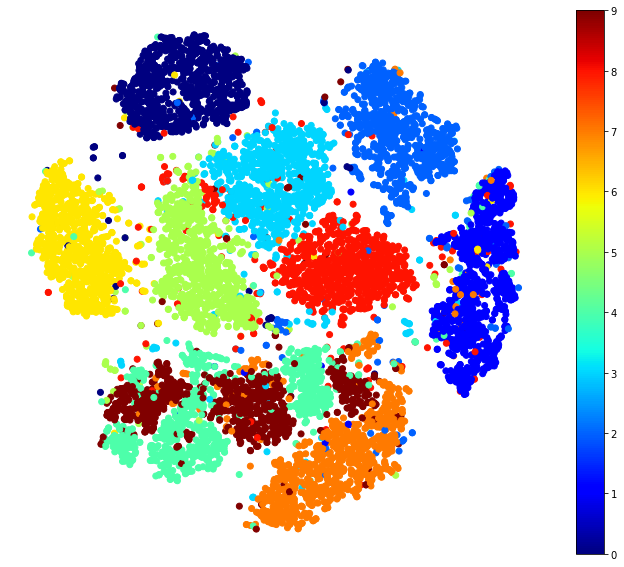

In [86]:
plt.figure(figsize=(12, 10))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_sub, cmap="jet")
plt.colorbar()
plt.axis("off")

(-87.37939643859862, 82.94289588928221, -94.13764114379882, 89.13379592895508)

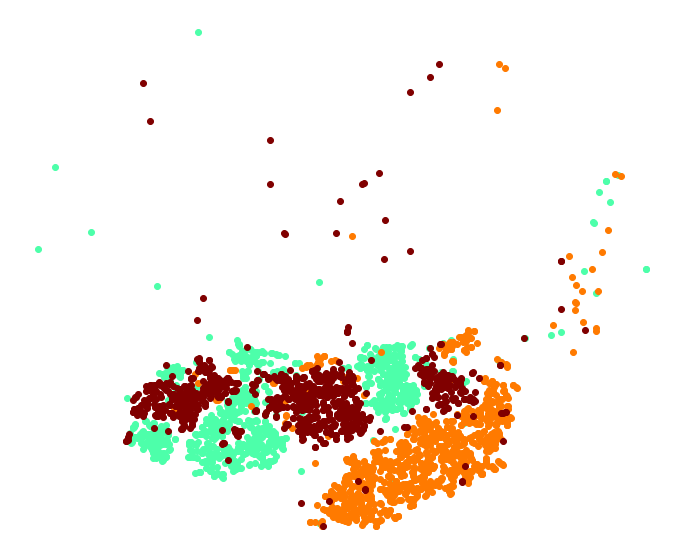

In [87]:
# Analyze numbers located close to each other and has overlaps
import matplotlib as mpl 

cmap = mpl.cm.get_cmap("jet")

plt.figure(figsize=(12, 10))
for digit in (4, 7, 9):
    plt.scatter(X_embedded[y_sub==digit, 0], X_embedded[y_sub==digit, 1], c=[cmap(digit/9)])
plt.axis("off")

In [88]:
overlap_digits = (y_sub == 4) | (y_sub == 7) | (y_sub == 9)
len(np.flatnonzero(overlap_digits))

2996

In [89]:
X_overlap = X_sub[overlap_digits]
y_overlap = y_sub[overlap_digits]

tsne = TSNE(n_components=2, n_jobs=-1)
X_overlap_embedded = tsne.fit_transform(X_overlap)

(-69.72850399017334, 76.61919384002684, -78.25885963439941, 83.34581184387207)

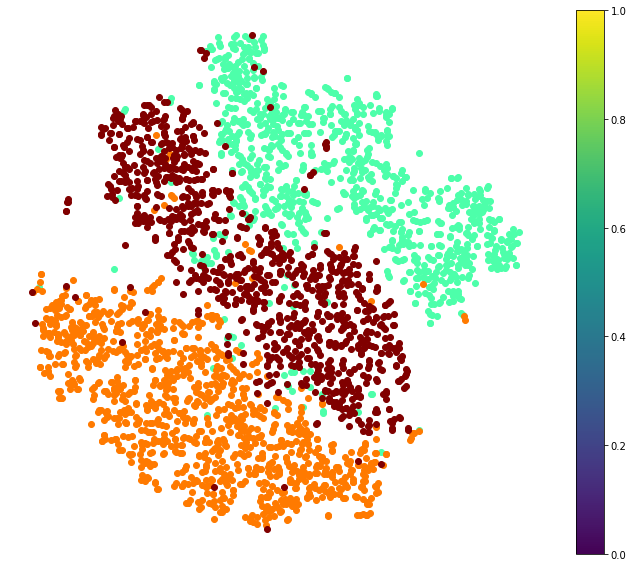

In [90]:
plt.figure(figsize=(12, 10))
for digit in (4, 7, 9):
    plt.scatter(X_overlap_embedded[y_overlap==digit, 0], X_overlap_embedded[y_overlap==digit, 1], c=[cmap(digit/9)])
plt.colorbar()
plt.axis("off")